In [ ]:
#Los primeros comandos se muestra acciones básicos de lo aprendido a través del curso, son comandos simples.

In [4]:
print("Hola, ¿cuál es tu nombre?")
nombre=str(input())
print("Hola " + nombre + "! " + "¡Bienvenido al curso de Python 101!")

Hola, ¿cuál es tu nombre?
Max
Hola Max! ¡Bienvenido al curso de Python 101!


In [8]:
print(type(12))
print(type("hola"))
print(type(0.1))

<class 'int'>
<class 'str'>
<class 'float'>


In [10]:
float(2)

2.0

In [11]:
100 / 50

2.0

In [1]:
nombre = "Max"
print(nombre)


Max


In [3]:
x = 50 + 50.0
print (x)

100.0


In [ ]:
#Una vez mostrados conocimientos básicos,continuaremos con el análisis de una base de datos obtenida en Yahoo Finance!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf

In [10]:
start_date = "2020-01-01"
end_date = "2021-10-01"

ticker = "TSLA"

tsla = yf.download(ticker, start_date, end_date)

print(tsla.head())
print(type(tsla))
print(tsla.tail())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  84.900002  86.139999  84.342003  86.052002  86.052002   47660500
2020-01-03  88.099998  90.800003  87.384003  88.601997  88.601997   88892500
2020-01-06  88.094002  90.311996  88.000000  90.307999  90.307999   50665000
2020-01-07  92.279999  94.325996  90.671997  93.811996  93.811996   89410500
2020-01-08  94.739998  99.697998  93.646004  98.428001  98.428001  155721500
<class 'pandas.core.frame.DataFrame'>
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-09-24  745.890015  774.799988  744.559998  774.390015  774.390015   
2021-09-27  773.119995  799.000000  769.309998  791.359985  791.359985   
2021-09-28  787.200012  795.640015  766.179993  777.559998

In [11]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2020-01-02 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       441 non-null    float64
 1   High       441 non-null    float64
 2   Low        441 non-null    float64
 3   Close      441 non-null    float64
 4   Adj Close  441 non-null    float64
 5   Volume     441 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 24.1 KB


In [12]:
tsla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
tsla.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,441.0,4.657284e+02,2.462988e+02,7.494000e+01,1.880020e+02,4.590240e+02,6.817100e+02,8.913800e+02
High,441.0,4.760272e+02,2.499601e+02,8.097200e+01,1.971960e+02,4.790400e+02,6.950000e+02,9.004000e+02
Low,441.0,4.545931e+02,2.419755e+02,7.010200e+01,1.825200e+02,4.425000e+02,6.683600e+02,8.716000e+02
Close,441.0,4.660613e+02,2.463343e+02,7.224400e+01,1.899840e+02,4.613000e+02,6.797000e+02,8.830900e+02
Adj Close,441.0,4.660613e+02,2.463343e+02,7.224400e+01,1.899840e+02,4.613000e+02,6.797000e+02,8.830900e+02
Volume,441.0,5.502758e+07,3.927281e+07,9.800600e+06,2.605340e+07,4.289400e+07,7.596100e+07,3.046940e+08


In [23]:
tsla.groupby(tsla.index.month)["Adj Close"].agg([np.mean, np.std])


,mean,std
Date,,
1,449.178198,367.093172
2,476.879419,324.819744
3,390.366799,277.314484
4,421.168905,293.029008
5,388.319051,232.949706
6,409.814002,220.975135
7,471.312788,186.718085
8,536.665203,180.728421
9,583.723810,174.431968


In [22]:
tsla.groupby(tsla.index.year).agg([np.mean,np.std])

Open                    High                     Low              \
            mean         std        mean         std        mean         std   
Date                                                                           
2020  289.108428  167.665389  297.288411  171.702889  280.697937  163.350196   
2021  703.413830   76.502662  716.563882   76.758446  688.611703   76.431055   

           Close               Adj Close                    Volume  \
            mean         std        mean         std          mean   
Date                                                                 
2020  289.997067  168.995613  289.997067  168.995613  7.530795e+07   
2021  702.998881   76.891567  702.998881   76.891567  2.773538e+07   

                    
               std  
Date                
2020  4.013706e+07  
2021  1.236174e+07

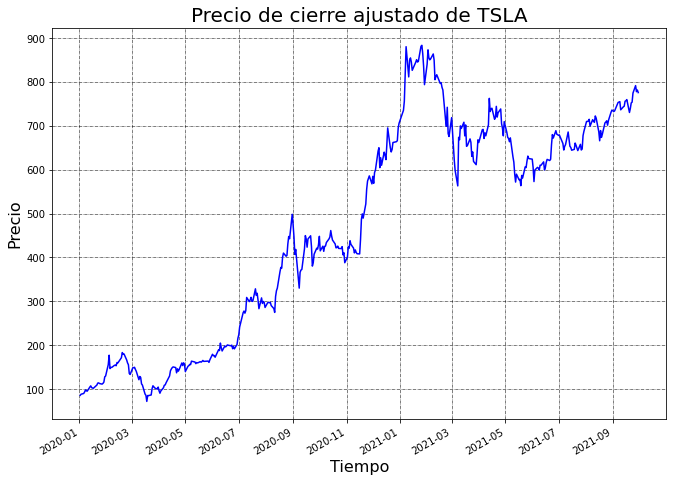

In [30]:
tsla["Adj Close"].plot(figsize=(11,8),color = "blue")
plt.title("Precio de cierre ajustado de %s" % ticker, fontsize=20)
plt.ylabel("Precio", fontsize=16)
plt.xlabel("Tiempo", fontsize=16)
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.5)
plt.show()

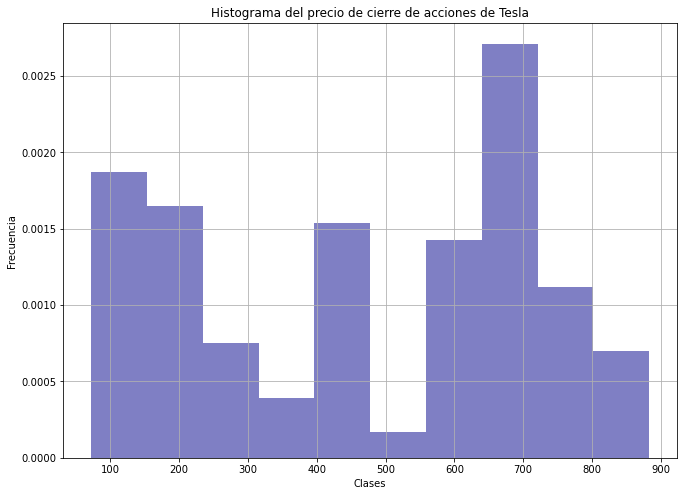

In [35]:
tsla["Adj Close"].hist(bins ="sturges", density= True, color = "darkblue", alpha = 0.5, figsize=(11,8))
plt.title("Histograma del precio de cierre de acciones de Tesla")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

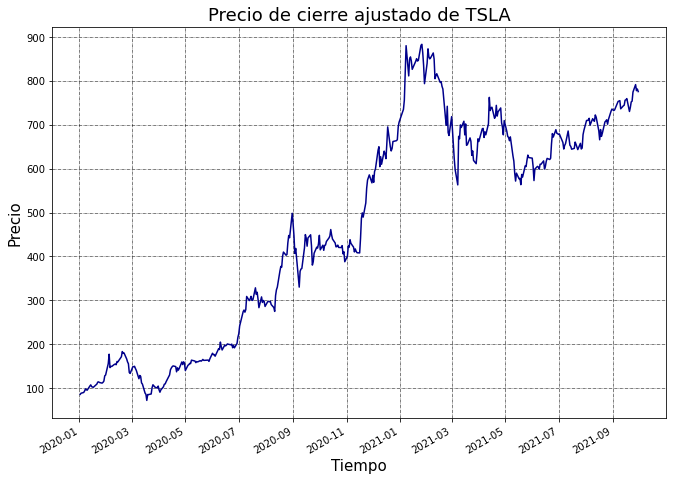

In [38]:
tsla["2020":"2021"]["Adj Close"].plot(figsize=(11,8), color ="darkblue")
plt.title("Precio de cierre ajustado de %s" %ticker,fontsize = 18)
plt.ylabel("Precio", fontsize=15)
plt.xlabel("Tiempo", fontsize=15)
plt.grid(which="major", color="k", linestyle="-.", linewidth=0.5)
plt.show()

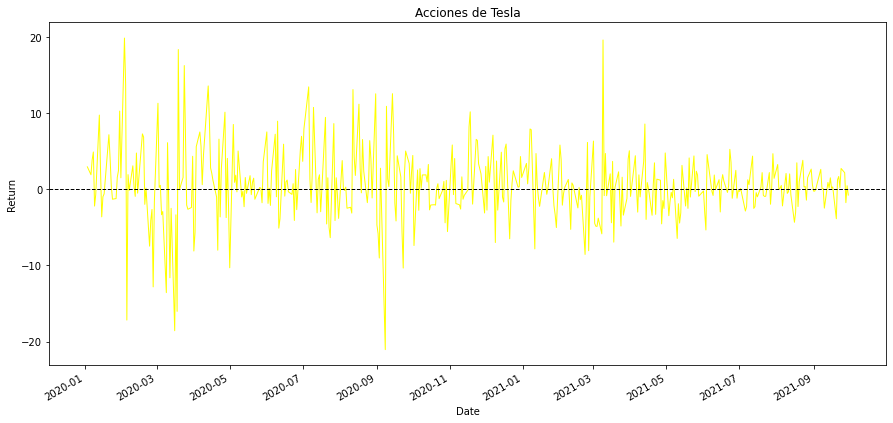

In [43]:
tsla["pct"]=tsla["Adj Close"].pct_change().mul(100)

ax=tsla["pct"].plot(figsize=(15,7), linewidth=1, color = "yellow")
ax.set_title("Acciones de Tesla")
ax.set_ylabel("Return")
ax.axhline(y=0, color="black", linestyle="--", linewidth=1)
plt.show()

In [52]:
start_date = "2020-01-01"
end_date = "2021-10-01"

tickers_list = ["AAPL", "AMZN", "TSLA", "FB", "NFLX", "GOOG"]

stocks = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
        stocks[ticker] = yf.download(ticker,
                                   start_date,
                                   end_date) ["Adj Close"]
stocks.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AMZN,TSLA,FB,NFLX,GOOG
Date,,,,,,
2020-01-02,73.988472,1898.010010,86.052002,209.779999,329.809998,1367.369995
2020-01-03,73.269150,1874.969971,88.601997,208.669998,325.899994,1360.660034
2020-01-06,73.852974,1902.880005,90.307999,212.600006,335.829987,1394.209961
2020-01-07,73.505653,1906.859985,93.811996,213.059998,330.750000,1393.339966
2020-01-08,74.688087,1891.969971,98.428001,215.220001,339.260010,1404.319946


In [54]:
stocks.tail()

,AAPL,AMZN,TSLA,FB,NFLX,GOOG
Date,,,,,,
2021-09-24,146.705887,3425.520020,774.390015,352.959991,592.390015,2852.659912
2021-09-27,145.158142,3405.800049,791.359985,353.579987,592.640015,2830.020020
2021-09-28,141.703186,3315.959961,777.559998,340.649994,583.849976,2723.679932
2021-09-29,142.621857,3301.120117,781.309998,339.609985,599.059998,2690.419922
2021-09-30,141.293793,3285.040039,775.479980,339.390015,610.340027,2665.310059


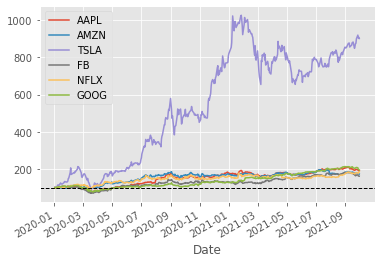

In [59]:
norm = stocks.div(stocks.iloc[0]).mul(100)
norm.plot(subplots=False)
plt.axhline(y=100, color="Black", linestyle = "--", linewidth=1, )
plt.show()

In [ ]:
#Una vez analizada la información de acciones, en este caso Tesla y una pequeña comparación con Amazon, Apple, Facebook,y Alphabet, ahora se tomara una serie de datos para aplizar más análisis de lo aprendido. En este caso es una base de datos común obtenida de la NBA

In [60]:
!pip install sklearn

In [63]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv("nba_data.csv", index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  50 non-null     object 
 1   POS.1   50 non-null     object 
 2   GP      50 non-null     int64  
 3   MIN     50 non-null     float64
 4   PTS     50 non-null     float64
 5   FGM     50 non-null     float64
 6   FGA     50 non-null     float64
 7   FG%     50 non-null     float64
 8   3PM     50 non-null     float64
 9   3PA     50 non-null     float64
 10  3P%     50 non-null     float64
 11  FTM     50 non-null     float64
 12  FTA     50 non-null     float64
 13  FT%     50 non-null     float64
 14  REB     50 non-null     float64
 15  AST     50 non-null     float64
 16  STL     50 non-null     float64
 17  BLK     50 non-null     float64
 18  TO      50 non-null     float64
 19  DD2     50 non-null     int64  
 20  TD3     50 non-null     int64  
 21  PER     50 non-null     float64
dtypes: f

In [67]:
print(df.head())

                       Nombre POS.1  GP   MIN   PTS   FGM   FGA   FG%  3PM  \
POS                                                                          
1             Kevin DurantBKN    AP  12  34.4  29.5  11.2  19.1  58.5  1.9   
2             Stephen CurryGS    BA  11  33.6  27.4   8.6  19.9  43.4  5.0   
3              Paul GeorgeLAC     E  10  35.0  26.7   9.9  21.6  45.8  3.2   
4    Giannis AntetokounmpoMIL    AP  12  32.9  26.6   9.5  19.2  49.6  1.3   
5                Ja MorantMEM    BA  11  35.3  26.5  10.0  20.6  48.5  1.7   

      3PA  ...  FTA   FT%   REB  AST  STL  BLK   TO  DD2  TD3    PER  
POS        ...                                                        
1     4.8  ...  6.3  82.9   8.5  5.0  0.6  0.7  3.5    6    1  29.21  
2    13.0  ...  5.4  94.9   6.5  6.5  1.6  0.6  3.1    4    1  26.65  
3     8.8  ...  4.3  86.0   8.2  5.4  2.5  0.5  4.6    4    0  22.04  
4     4.7  ...  9.1  68.8  11.8  6.0  1.1  1.8  3.0    8    0  29.77  
5     5.0  ...  6.2  77.9  

In [68]:
print(df.tail())

                   Nombre POS.1  GP   MIN   PTS  FGM   FGA   FG%  3PM  3PA  \
POS                                                                          
46         Will BartonDEN    SF  11  33.3  17.5  6.9  14.1  49.0  2.6  6.1   
47       Andrew WigginsGS    SF  11  29.4  17.4  6.5  13.6  47.3  1.8  5.2   
48     Carmelo AnthonyLAL    AP  12  29.3  17.2  6.1  12.3  49.3  3.3  6.7   
49    D'Angelo RussellMIN    BA   8  30.4  17.1  6.3  16.1  38.8  2.9  8.5   
50   Bojan BogdanovicUTAH    SF  11  30.6  17.0  5.5  12.8  43.3  1.7  5.5   

     ...  FTA   FT%  REB  AST  STL  BLK   TO  DD2  TD3    PER  
POS  ...                                                       
46   ...  1.4  73.3  4.6  4.4  1.4  0.6  1.7    0    0  19.66  
47   ...  3.2  82.9  4.3  1.5  0.9  0.3  1.6    0    0  16.13  
48   ...  2.1  80.0  3.8  1.0  0.8  0.9  0.8    0    0  19.46  
49   ...  2.1  82.4  3.6  5.1  0.8  0.8  3.1    0    0  13.04  
50   ...  4.4  95.8  4.3  1.5  0.5  0.0  1.3    0    0  16.77  

[5 r

In [71]:
X = df[["GP", "MIN", "PTS", "AST", "REB", "FG%", "STL", "BLK",]]
print(X.describe().T)

     count    mean       std   min     25%    50%     75%   max
GP    50.0  11.040  1.159873   8.0  10.000  11.00  12.000  13.0
MIN   50.0  33.932  2.344376  28.7  32.675  34.40  35.475  38.5
PTS   50.0  21.512  3.362921  17.0  18.625  20.95  23.975  29.5
AST   50.0   4.598  2.085077   1.0   3.025   4.35   5.675   9.3
REB   50.0   6.942  2.904682   2.7   4.700   6.15   8.675  14.0
FG%   50.0  46.224  5.643257  38.0  42.925  43.90  49.225  64.0
STL   50.0   1.186  0.470349   0.3   0.800   1.15   1.500   2.5
BLK   50.0   0.622  0.447802   0.0   0.300   0.50   0.800   2.3


In [74]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

x_df = pd.DataFrame(X_ss, columns =
                    ["GP", "MIN", "PTS", "AST", "REB", "FG%", "STL", "BLK"])
print(x_df.describe().T)

     count          mean       std       min       25%       50%       75%  \
GP    50.0  7.760459e-16  1.010153 -2.647585 -0.905753 -0.034837  0.836080   
MIN   50.0  1.953993e-15  1.010153 -2.254382 -0.541620  0.201653  0.664853   
PTS   50.0  8.970602e-16  1.010153 -1.355312 -0.867196 -0.168813  0.739835   
AST   50.0  9.325873e-17  1.010153 -1.743115 -0.762068 -0.120148  0.521772   
REB   50.0 -4.440892e-17  1.010153 -1.475227 -0.779694 -0.275431  0.602680   
FG%   50.0 -7.860379e-16  1.010153 -1.472110 -0.590527 -0.416000  0.537184   
STL   50.0  1.421085e-16  1.010153 -1.902830 -0.828998 -0.077316  0.674367   
BLK   50.0  1.332268e-17  1.010153 -1.403109 -0.726368 -0.275208  0.401533   

          max  
GP   1.706996  
MIN  1.968275  
PTS  2.399431  
AST  2.277967  
REB  2.454539  
FG%  3.181934  
STL  2.822031  
BLK  3.785236  


In [75]:
!pip install seaborn

In [77]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

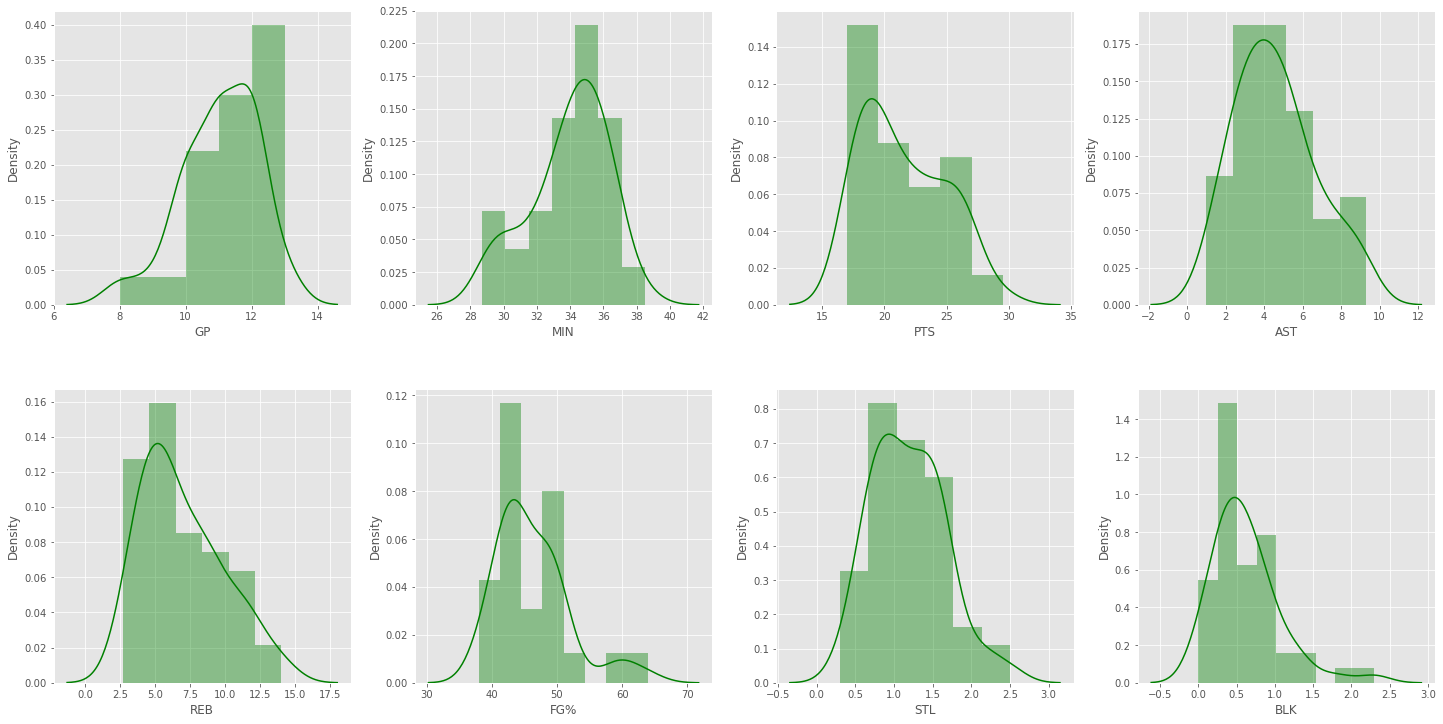

In [80]:
fig, ax= plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in X.items():
    sns.distplot (value, color="g", ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

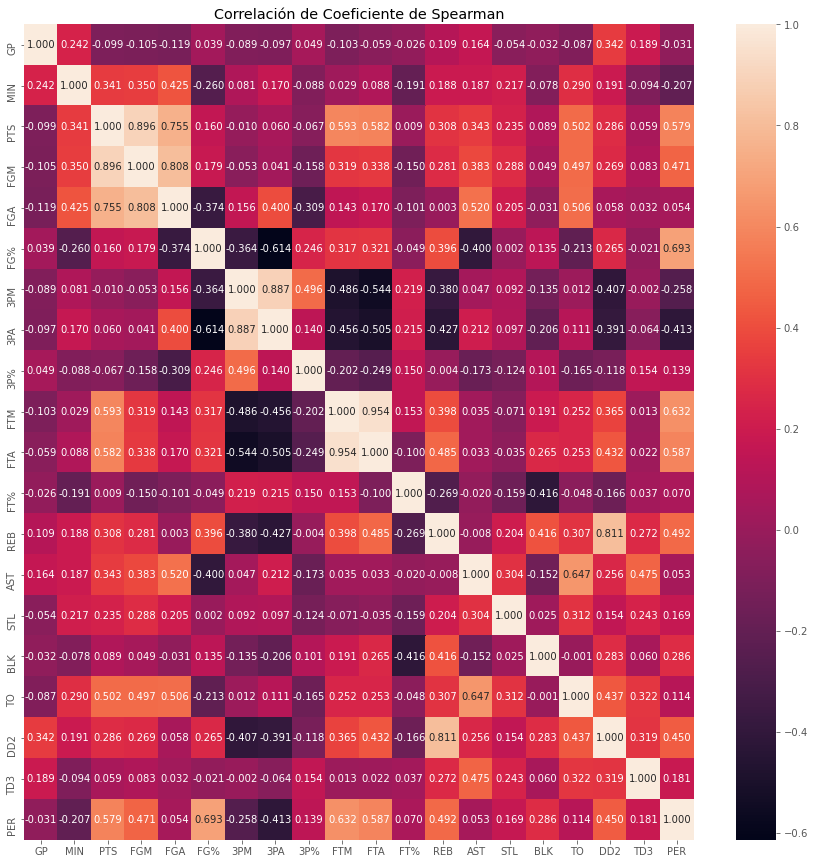

In [82]:
corr_spearman = df.corr(method= "spearman")
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Correlación de Coeficiente de Spearman")
plt.show()